In [2]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import os

url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df = pd.read_csv(url)


In [3]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,24,40,40,74,84,94,110,110,120
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,70,76,89,104,123,146,174,186,197,212
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,90,139,201,230,264,302,367,409,454,511
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,75,88,113,133,164,188,224,267,308,334
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,1,2,2,3,3,3,4,4,5,7


In [5]:
d1=df.groupby('Country/Region').sum()

In [16]:
d1.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,...,24,24,40,40,74,84,94,110,110,120
Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,...,70,76,89,104,123,146,174,186,197,212
Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,...,90,139,201,230,264,302,367,409,454,511
Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,...,75,88,113,133,164,188,224,267,308,334
Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,...,1,2,2,3,3,3,4,4,5,7


In [21]:
d1.head()


,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,New Cases
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,-110
Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,-197
Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,...,139,201,230,264,302,367,409,454,511,-454
Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,...,88,113,133,164,188,224,267,308,334,-308
Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,...,2,2,3,3,3,4,4,5,7,-5


In [24]:

del d1["New Cases"]


In [28]:
d1.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,New Cases
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,
Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,
Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,...,139,201,230,264,302,367,409,454,511,
Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,...,88,113,133,164,188,224,267,308,334,
Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,...,2,2,3,3,3,4,4,5,7,


In [27]:
d1["New Cases"] = ""

In [29]:
for i in range(len(d1)):
    d1.iloc[i,-1]=d1.iloc[i,-2]-d1.iloc[i,-3]
    

In [30]:
d1.head()


,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,New Cases
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,10
Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,15
Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,...,139,201,230,264,302,367,409,454,511,57
Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,...,88,113,133,164,188,224,267,308,334,26
Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,...,2,2,3,3,3,4,4,5,7,2


In [42]:
d1.head(200)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,New Cases
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,37.090200,-95.712900,1,1,2,2,5,5,5,5,...,25489,33276,43847,53740,65778,83836,101657,121478,140886,19408
Spain,40.000000,-4.000000,0,0,0,0,0,0,0,0,...,25374,28768,35136,39885,49515,57786,65719,73235,80110,6875
Italy,43.000000,12.000000,0,0,0,0,0,0,0,0,...,53578,59138,63927,69176,74386,80589,86498,92472,97689,5217
Germany,51.000000,9.000000,0,0,0,0,0,1,4,4,...,22213,24873,29056,32986,37323,43938,50871,57695,62095,4400
Iran,32.000000,53.000000,0,0,0,0,0,0,0,0,...,20610,21638,23049,24811,27017,29406,32332,35408,38309,2901
France,44.477200,116.035100,0,0,2,3,3,3,4,5,...,14463,16243,20123,22622,25600,29551,33402,38105,40708,2603
United Kingdom,321.826200,-423.401100,0,0,0,0,0,0,0,0,...,5067,5745,6726,8164,9640,11812,14745,17312,19780,2468
Turkey,38.963700,35.243300,0,0,0,0,0,0,0,0,...,670,1236,1529,1872,2433,3629,5698,7402,9217,1815
Belgium,50.833300,4.000000,0,0,0,0,0,0,0,0,...,2815,3401,3743,4269,4937,6235,7284,9134,10836,1702


In [33]:
import pyplot as plt

ImportError: No module named pyplot

In [34]:
import matplot as plt

ImportError: No module named matplot

In [35]:
import matplotlib as plt

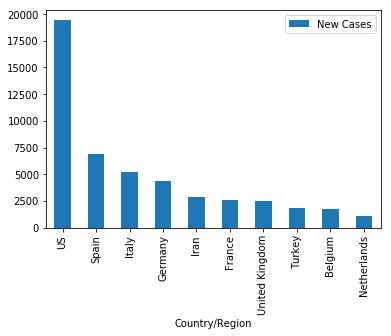

In [44]:
d1.head(10).plot(kind = 'bar', y = 'New Cases')


In [41]:
d1=d1.sort_values(by='New Cases', ascending=False)
d1.head()


,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,New Cases
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,37.0902,-95.7129,1,1,2,2,5,5,5,5,...,25489,33276,43847,53740,65778,83836,101657,121478,140886,19408
Spain,40.0000,-4.0000,0,0,0,0,0,0,0,0,...,25374,28768,35136,39885,49515,57786,65719,73235,80110,6875
Italy,43.0000,12.0000,0,0,0,0,0,0,0,0,...,53578,59138,63927,69176,74386,80589,86498,92472,97689,5217
Germany,51.0000,9.0000,0,0,0,0,0,1,4,4,...,22213,24873,29056,32986,37323,43938,50871,57695,62095,4400
Iran,32.0000,53.0000,0,0,0,0,0,0,0,0,...,20610,21638,23049,24811,27017,29406,32332,35408,38309,2901


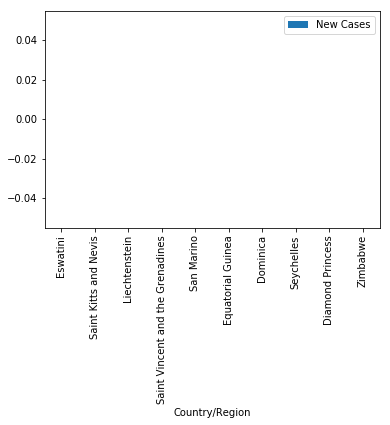

In [45]:
d1.tail(10).plot(kind = 'bar', y = 'New Cases')


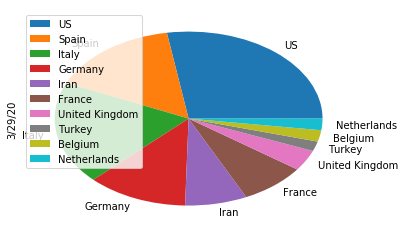

In [46]:
d1.head(10).plot(kind = 'pie', y = '3/29/20')


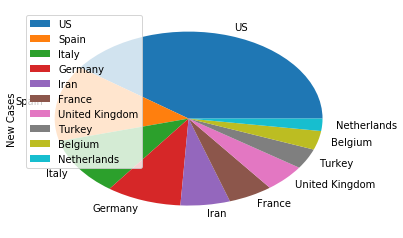

In [48]:
d1.head(10).plot(kind = 'pie',y = d1.columns[-1])
